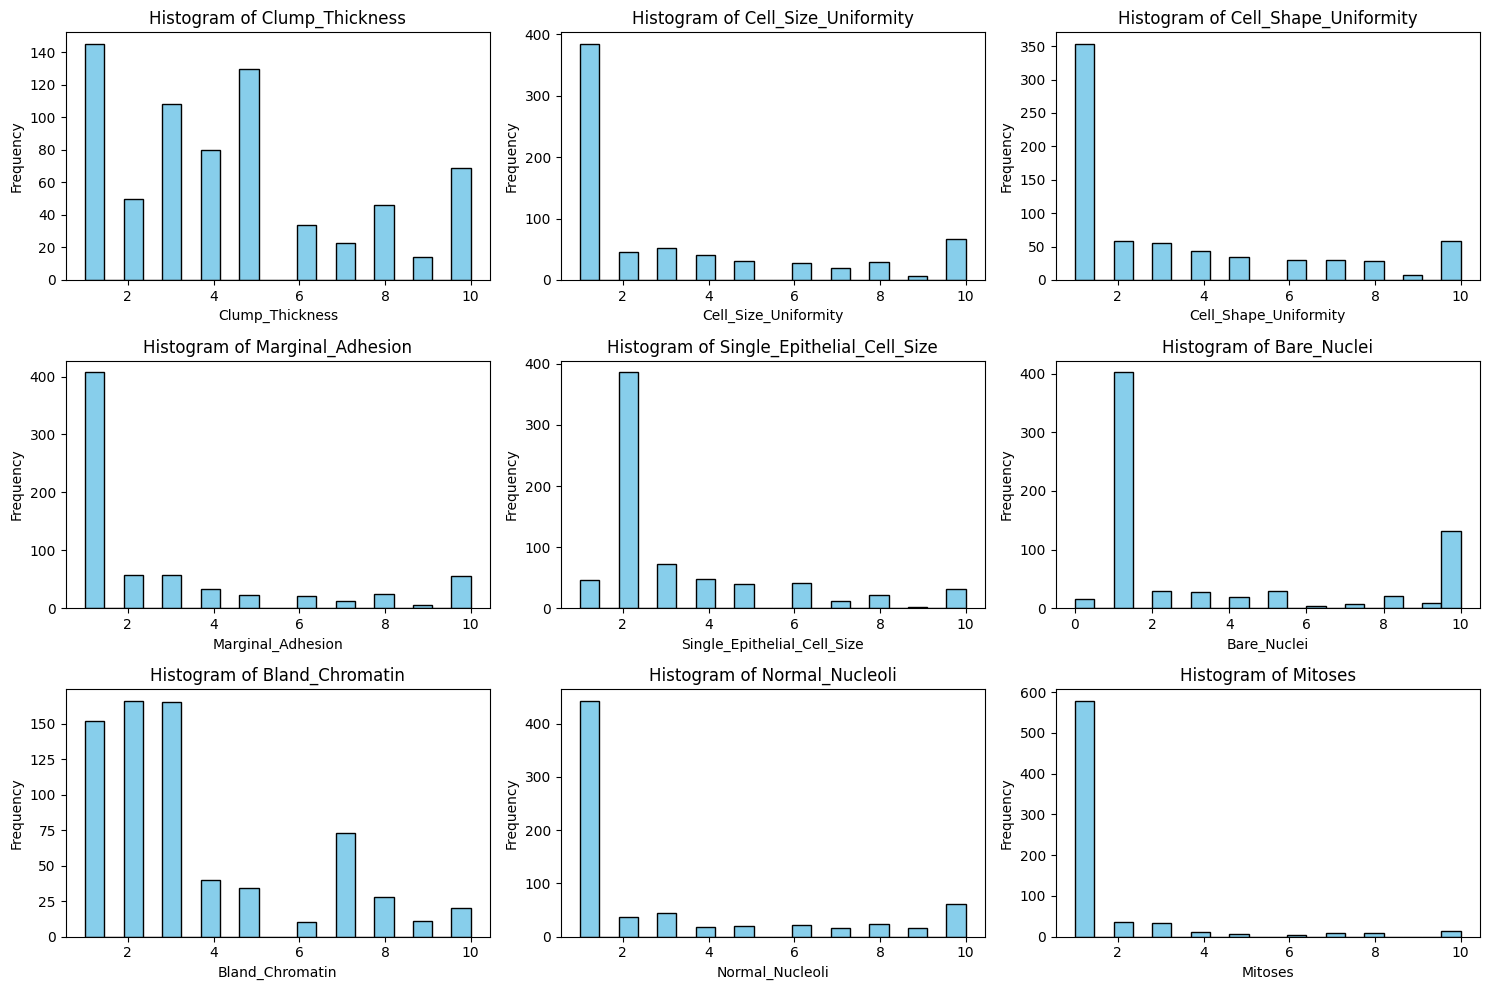

In [5]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/breast_cancer.csv', header=None)

# Assign column names based on the description provided
data.columns = ['Sample_Code', 'Class', 'Clump_Thickness', 'Cell_Size_Uniformity',
                'Cell_Shape_Uniformity', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
                'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']

# Separate benign and malignant samples
benign_samples = data[data['Class'] == 2].sample(n=80, random_state=42)
malignant_samples = data[data['Class'] == 4].sample(n=40, random_state=42)

# Combine test samples
test_data = pd.concat([benign_samples, malignant_samples])

# Get training data by dropping the test data from the original data
train_data = data.drop(test_data.index)

# Prepare training features and labels
X_train = train_data.drop(['Sample_Code', 'Class'], axis=1)
y_train = train_data['Class']

# Prepare testing features and labels
X_test = test_data.drop(['Sample_Code', 'Class'], axis=1)
y_test = test_data['Class']

# List of feature columns
feature_columns = ['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity', 
                   'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
                   'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 3x3 grid for 9 features
axes = axes.ravel()  # Flatten the 2D array of axes to 1D for easier iteration

# Loop through each feature and plot the histogram
for i, feature in enumerate(feature_columns):
    axes[i].hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
# Initialize the GaussianNB classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label=4)

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label=4)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.97
Precision: 0.95
Recall: 0.95

Confusion Matrix:
 [[78  2]
 [ 2 38]]

Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.97      0.97        80
           4       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120

